#  Assignment 2 - Data Acquisition, Pre-processing and Data Analysis

## Contributers:


#### Reni Koci (renik98) 
#### Viktoria Voucheva (vouchev00)
#### Muhammad Furqan Rafique (rafim96)

## <center>1. Data Acquisition</center> 

We are asked to use German Credit Data(GCD) for the Assignment 2. This dataset classifies people described by a set of attributes as good or bad credit risks. It comes in two formats: 

(i):- 'german.data' (having categorical and numeric values); this is  a original dataset, in the form provided by Prof. Hofmann

(ii):- 'german.data-numeric' file (having all numeric values); Strathclyde University produced this format for algorithms that need numerical attributes

Further we are given that, it is worse to class a customer as good when they are bad, than it is to class a customer as bad when they are good.

For the sake of this assignment, we are going to work on the original dataset (i.e. german.data). Following is the description of the attributes in this file

### Description of attributes

1. Status -> Status of existing checking account <br>
        A11 :      ... <    0 DM
        A12 : 0 <= ... <  200 DM
        A13 :      ... >= 200 DM salary assignments for at least 1 year
        A14 : no checking account

2. Duration -> Duration in month
3. Credit history -> 
        A30 : no credits taken all credits paid back duly
        A31 : all credits at this bank paid back duly
        A32 : existing credits paid back duly till now
        A33 : delay in paying off in the past
        A34 : critical account other credits existing (not at this bank)

4. Purpose 
        A40 : car (new)
        A41 : car (used)
        A42 : furniture/equipment
        A43 : radio/television
        A44 : domestic appliances
        A45 : repairs
        A46 : education
        A47 : (vacation - does not exist?)
        A48 : retraining
        A49 : business
        A410 : others

5. Credit amount
6. Savings account/bonds
        A61 :          ... <  100 DM
        A62 :   100 <= ... <  500 DM
        A63 :   500 <= ... < 1000 DM
        A64 :          .. >= 1000 DM
        A65 :   unknown/ no savings account

7. Employment -> Present Empoyment since
        A71 : unemployed
        A72 :       ... < 1 year
        A73 : 1  <= ... < 4 years  
        A74 : 4  <= ... < 7 years
        A75 :       .. >= 7 years

8. Installment rate -> Installment rate in percentage of disposable income
9. Status and sex
        A91 : male   : divorced/separated
        A92 : female : divorced/separated/married
        A93 : male   : single
        A94 : male   : married/widowed
        A95 : female : single

10. Other debtors/guarantors -> Other debtors / guarantors
        A101 : none
        A102 : co-applicant
        A103 : guarantor

11. Present residence since
12. Property
        A121 : real estate
        A122 : if not A121 : building society savings agreement life insurance
        A123 : if not A121/A122 : car or other, not in attribute 6
        A124 : unknown / no property

13. Age
14. Other installment plans
        A141 : bank
        A142 : stores
        A143 : none

15. Housing
        A151 : rent
        A152 : own
        A153 : for free

16. Number of existing credits at this bank
17. Job
        A171 : unemployed/ unskilled  - non-resident
        A172 : unskilled - resident
        A173 : skilled employee / official
        A174 : management/ self-employed highly qualified employee/ officer

18. Number of people being liable -> Number of people being liable to provide maintenance for
19. Telephone
        A191 : none
        A192 : yes, registered under the customers name

20. Foreign worker
        A201 : yes
        A202 : no

- <b>Label<b/>
        1 = Good,  2 = Bad

## <center>2. Pre-processing</center> 

In [1]:
# importing useful libraries 
import pandas as pd

In [2]:
# Add a header row with the attribute names.

columns = ['Status', 'Duration', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account/bonds', 'Employment', 'Installment rate', 'Status and sex',
           'Other debtors/guarantors','Present residence since', 'Property', 
           'Age', 'Other installment plans', 'Housing', 
           'Number of existing credits at this bank', 'Job',
          'Number of people being liable', 'Telephone', 'Foreign worker', 'label']

original_df = pd.read_csv('german.data', sep=' ', names=columns)

In [3]:
original_df.head()

,Status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Employment,Installment rate,Status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable,Telephone,Foreign worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Convert all categorical data points into something more human-understandable

In [4]:
# create a new df to not change the original one
df = original_df.copy()

In [5]:
# status
status_dict = {
    'A11' :  '<0 DM',
    'A12' : '0-200 DM',
    'A13' : '>=200 DM',
    'A14' : 'no checking account'
}

df.replace({'Status': status_dict},inplace=True)

In [6]:
# credit history
ch_dict = {
    'A30' : 'no credits taken all credits paid back duly',
    'A31' : 'all credits at this bank paid back duly',
    'A32' : 'existing credits paid back duly till now',
    'A33' : 'delay in paying off in the past',
    'A34' : 'critical account other credits existing (not at this bank)'
}


df.replace({'Credit history': ch_dict},inplace=True)

In [7]:
# purpose
purpose_dict = {
    'A40' : 'car (new)',
    'A41' : 'car (used)',
    'A42' : 'furniture/equipment',
    'A43' : 'radio/television',
    'A44' : 'domestic appliances',
    'A45' : 'repairs',
    'A46' : 'education',
    'A47' : 'vacation',
    'A48' : 'retraining',
    'A49' : 'business',
    'A410' : 'others'
}

df.replace({'Purpose': purpose_dict},inplace=True)

In [8]:
# Savings account/bonds
acb_dict = {
    'A61' :  '<100 DM',
    'A62' :  '100-500 DM',
    'A63' :  '500-1000 DM',
    'A64' :  '>=1000 DM',
    'A65' :  'unknown/no savings account'
}

df.replace({'Savings account/bonds': acb_dict},inplace=True)

In [9]:
# Employment -> Present Empoyment since
empl_dict = {
    'A71' : 'unemployed',
    'A72' : '<1 year',
    'A73' : '1-4 years',
    'A74' : '4-7 years',
    'A75' : '>=7 years'
}

df.replace({'Employment': empl_dict},inplace=True)

In [10]:
# Status and sex
ss_dict = {
    'A91' :' male: divorced/separated',
    'A92' : 'female: divorced/separated/married',
    'A93' : 'male: single',
    'A94' : 'male: married/widowed',
    'A95' : 'female: single'
}

df.replace({'Status and sex': ss_dict},inplace=True)

In [11]:
# Other debtors/guarantors -> Other debtors / guarantors
dg_dict = {
    'A101' : 'none',
    'A102' : 'co-applicant',
    'A103' : 'guarantor'
}

df.replace({'Other debtors/guarantors': dg_dict},inplace=True)

In [12]:
# Propery 
property_dict = {
    'A121' : 'real estate',
    'A122' : 'if not A121 : building society savings agreement life insurance',
    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
    'A124' : 'unknown / no property'
}

df.replace({'Property': property_dict},inplace=True)

In [13]:
# Other installment plans

ois_dict = {
    'A141' : 'bank',
    'A142' : 'stores',
    'A143' : 'none'
}

df.replace({'Other installment plans': ois_dict},inplace=True)

In [14]:
# housing 
housing_dict = {
    'A151' : 'rent',
    'A152' : 'own',
    'A153' : 'for free'
}

df.replace({'Housing': housing_dict},inplace=True)

In [15]:
# job
job_dict = {
    'A171' : 'unemployed/ unskilled  - non-resident',
    'A172' : 'unskilled - resident',
    'A173' : 'skilled employee / official',
    'A174' : 'management/ self-employed highly qualified employee/ officer',
}


df.replace({'Job': job_dict},inplace=True)

In [16]:
#Telephone
tl_dict = {
    'A191' : 'none',
    'A192' : 'yes, registered under the customers name'
}

df.replace({'Telephone': tl_dict},inplace=True)

In [17]:
#Foreign worker
fw_dict = {
    'A201' : 'yes',
    'A202' : 'no'
}

df.replace({'Foreign worker': fw_dict},inplace=True)


#### saving modified dataframe as csv file (german_processed.csv)

In [18]:
df.to_csv('german_processed.csv')

## <center>3. Data Analysis</center>  

### A. Univariate Analysis

In [19]:
# importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# setting the parameters for graphs

sns.set_context("poster")

# change default figure size
sns.set(rc={'figure.figsize': (12, 6)})

# change plot graph style
sns.set_style("darkgrid")

# change color palette
sns.set_palette("dark")

#### (i): Status

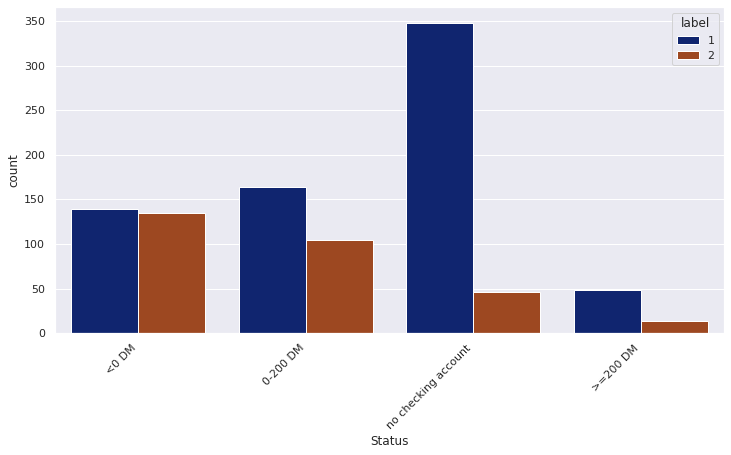

In [21]:
sns.countplot(x=df["Status"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()

This shows that the people with no cheching account are greater in numbers, whereas those having <0 DM are almost equally good and bad

#### (ii): Most common purposes

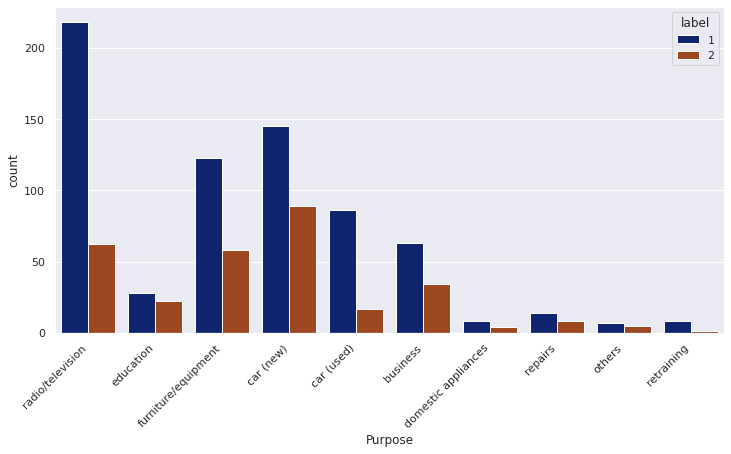

In [22]:
sns.countplot(x=df["Purpose"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()

The most common reason is radio/television. But also if we put together the credits for buying a car (used or new), then the most common reason becomes buying a car. Also the next one is getting credit for buying new furniture or equiment for the house. We can also see that the most bad credits are from the car (new)

#### (iii): Marital Status and sex of applicants

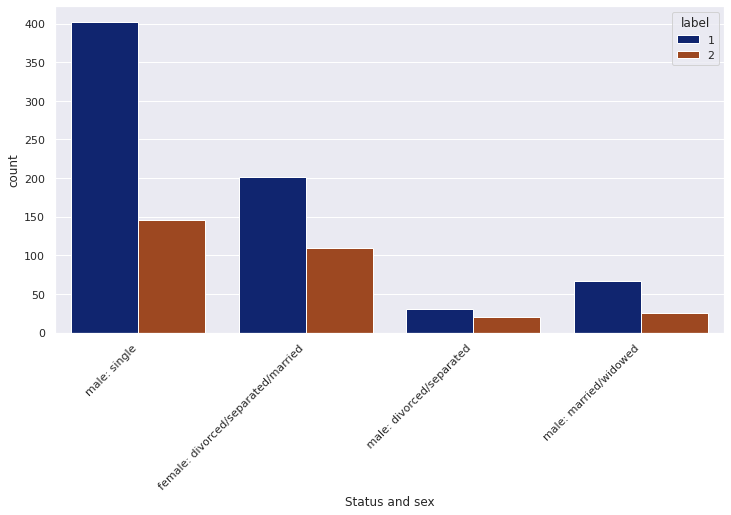

In [23]:
sns.countplot(x=df["Status and sex"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()


Single males are applying for credits more than others. This may leads our model biased towards single males, and this is something we have to look for while training our model.

#### (iv): Age

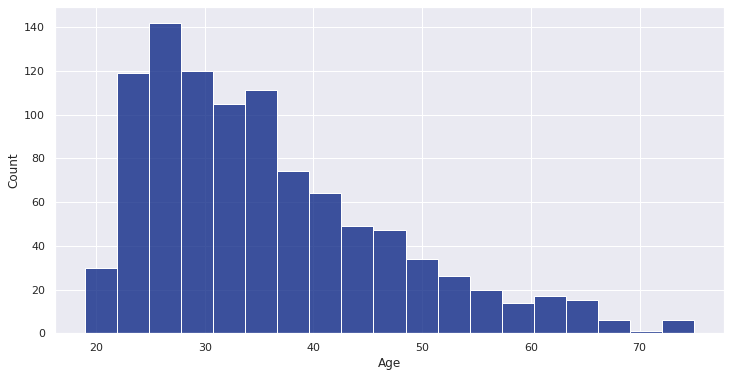

In [24]:
sns.histplot(data=df, x='Age')
plt.show()

Predictable, usually people take a credit younger to boost their lives. Older people however are financally more stable and are less likely to get a loan

#### (v) Present Employment

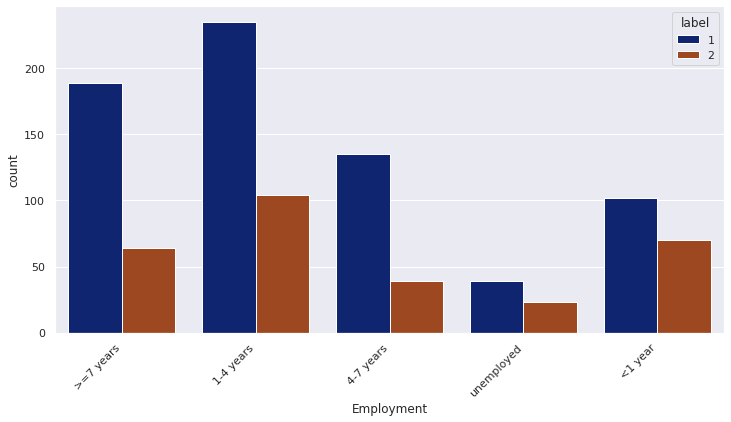

In [25]:
sns.countplot(x=df["Employment"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()

This appears very unnatural as only few unemployed people are there in the dataset. However, people in their earlier careers are in greater figures

#### (vi): Job

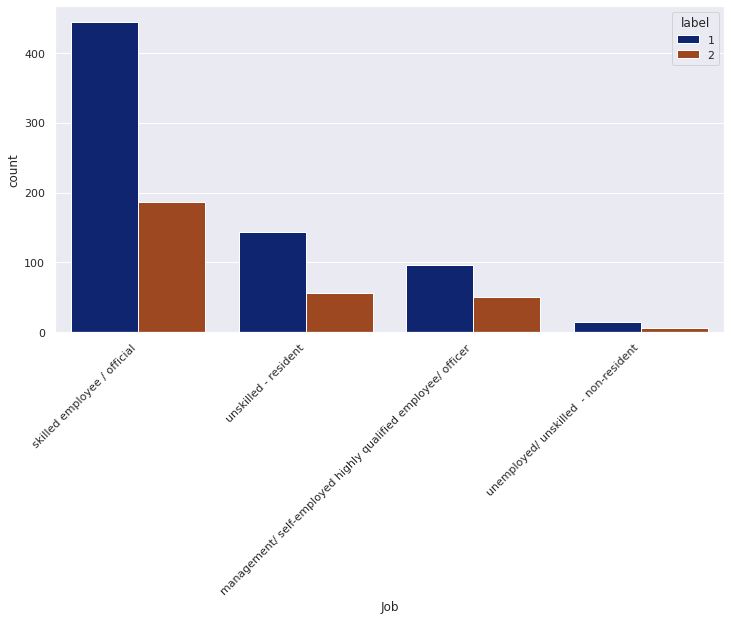

In [26]:
sns.countplot(x=df["Job"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()

#### (vii): Foreign worker

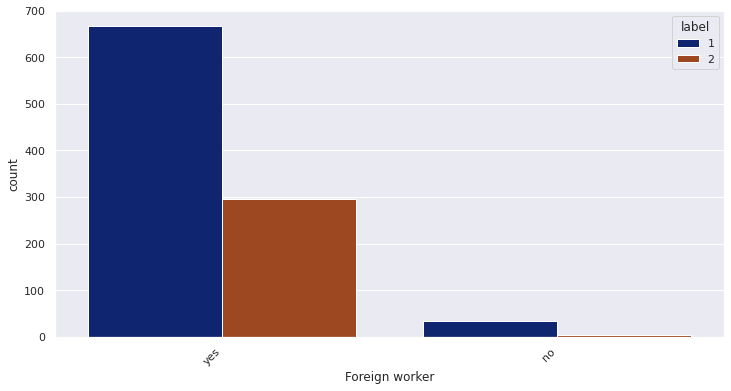

In [27]:
sns.countplot(x=df["Foreign worker"],hue=df["label"])
plt.xticks(rotation=45, ha='right')
plt.show()

So most of the credit applicants are foreign. 

In [28]:
# percentage of foreign workes
values = df['Foreign worker'].value_counts().to_list()
print("Percentage of foreign workes:", (values[0]/df.shape[0])*100, '%')

Percentage of foreign workes: 96.3 %


#### (viii): Housing

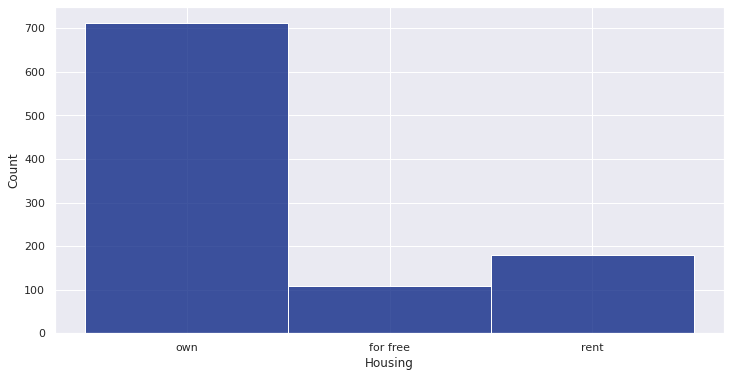

In [29]:
sns.histplot(data=df, x='Housing')
plt.show()

By assumption, most of these guys are also renting or living for free but that's not a case.

#### (ix): Let find out the std,max,min and quantile portion of numerical features 

In [30]:
df.describe()

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits at this bank,Number of people being liable,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### B. Bivariate Analysis

#### (i) Covariance matrix (numerical features)

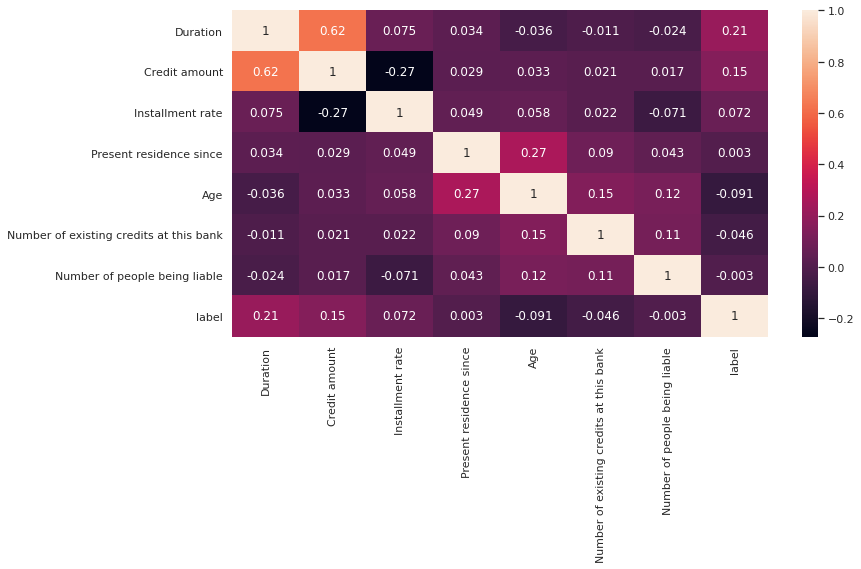

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### (ii) Chi-square (categorical features)

In [32]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

cat_df = pd.DataFrame(df, columns=['Status', 'Credit history', 'Purpose', 'Savings account/bonds',
                                           'Employment', 'Status and sex', 'Other debtors/guarantors', 
                                           'Present residence since',
                                           'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 
                                           'Foreign worker', 'label'])

features_header= ['Status', 'Credit history', 'Purpose', 'Savings account/bonds', 'Employment', 'Status and sex', 
                  'Other debtors/guarantors', 'Present residence since', 
                  'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'Foreign worker']

for v in features_header:
    X= cat_df[v].astype(str)
    Y= cat_df["label"].astype(str)
    dfObserved = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    #print(dfObserved)
    #print("\n")
    if p<0.05:
        print("{0} is IMPORTANT \n".format(v))
    else:
        print("{0} is NOT IMPORTANT \n".format(v))

Status is IMPORTANT 

Credit history is IMPORTANT 

Purpose is IMPORTANT 

Savings account/bonds is IMPORTANT 

Employment is IMPORTANT 

Status and sex is IMPORTANT 

Other debtors/guarantors is IMPORTANT 

Present residence since is NOT IMPORTANT 

Property is IMPORTANT 

Other installment plans is IMPORTANT 

Housing is IMPORTANT 

Job is NOT IMPORTANT 

Telephone is NOT IMPORTANT 

Foreign worker is IMPORTANT 



Chi-square analysis shows the importance of categorical with respect to labels

### C. Multivariate Analysis (numerical features)

#### PCA

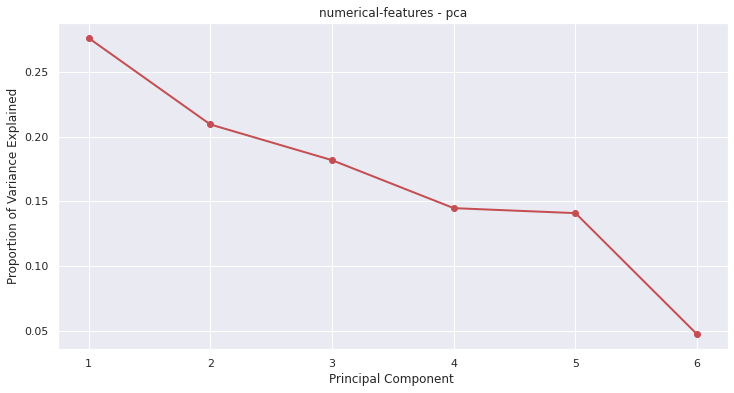

In [33]:
from sklearn.decomposition import PCA

num_df = pd.DataFrame(df, columns=['Duration', 'Credit amount', 'Installment rate', 'Age', 
                                              'Number of existing credits at this bank',
                                              'Number of people being liable'])

num_df_nor = (num_df.to_numpy()-num_df.to_numpy().mean(axis=0))/num_df.to_numpy().std(axis=0)


pca = PCA().fit(num_df_nor)
                      
                      
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('numerical-features - pca')
plt.xlabel('Principal Component ')
plt.ylabel('Proportion of Variance Explained')
plt.show()

This shows that all numerical features are important. 

Note:- We are treating 'Present residence since' as categorical feature